In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [209]:
#Load dataset
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [210]:
#Shows row and columns
df.shape

(178, 14)

In [211]:
#Shows data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [212]:
#check missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [213]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


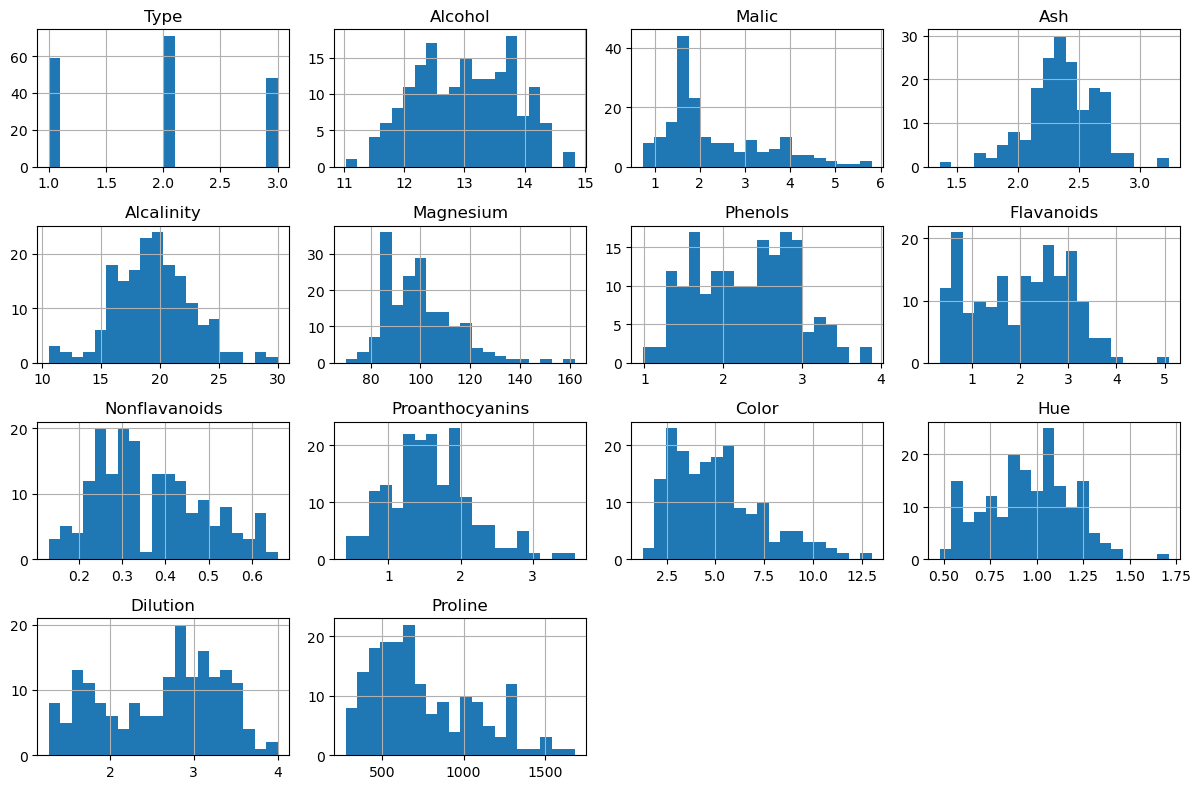

In [214]:
#Histogram
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

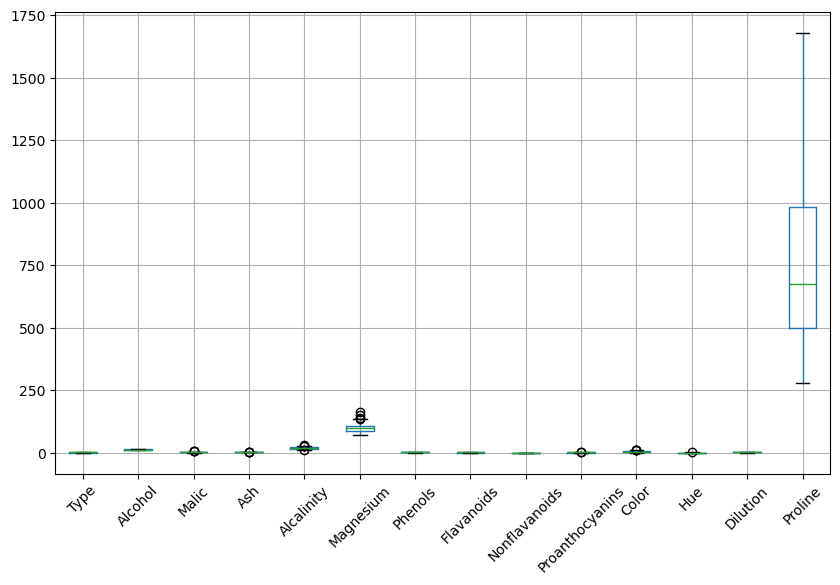

In [215]:
#Boxplot (Outliers Detection)
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [216]:
#Outlier Treatment (IQR Capping)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df.clip(lower=lower, upper=upper, axis=1)


In [217]:
#Correlation between vriables
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


In [218]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)

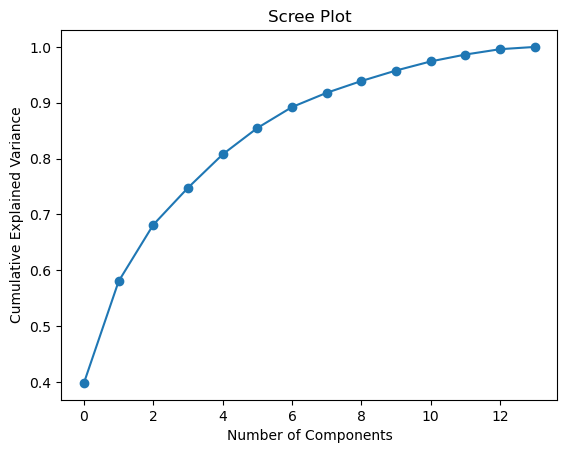

In [219]:
#Scree plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()


In [220]:
#Cluster on Original Data
from sklearn.cluster import KMeans
original_model = KMeans(n_clusters=5,random_state=42)
df["Cluster_org"] = original_model.fit_predict(X)
df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_org
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [221]:
#No of clusters and their counts
df["Cluster_org"].value_counts()

Cluster_org
1    49
3    41
4    36
2    26
0    26
Name: count, dtype: int64

In [222]:
#Silhouette score for original data
from sklearn.metrics import silhouette_score
original_Sscore = silhouette_score(X,df["Cluster_org"])
print("silhoutter score:", original_Sscore)

silhoutter score: 0.18726796728288767


In [231]:
# checking the with different k values
scores_1 = []

for i in range(2,11,1):
    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=i,random_state=42)
    scores_1.append(silhouette_score(X,model.fit_predict(X)))
print(scores_1)

[np.float64(0.28603994423901924), np.float64(0.3069772963964642), np.float64(0.2577144239688035), np.float64(0.18726796728288767), np.float64(0.17939056742145465), np.float64(0.1693565030406612), np.float64(0.16511821638939084), np.float64(0.16021501317913187), np.float64(0.11620886175286084)]


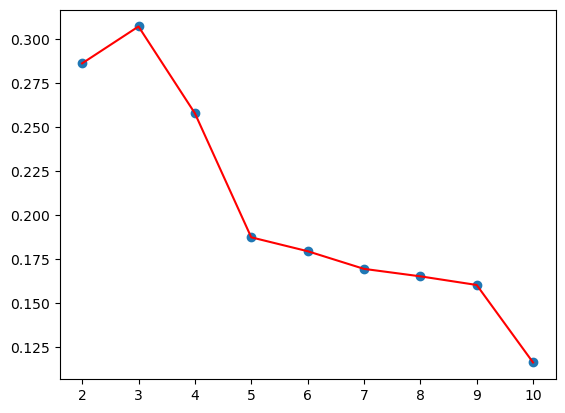

In [233]:
#Visualization of k values vs Silhouette_score (Original Data)
import matplotlib.pyplot as plt
plt.scatter(x=range(2,11,1),y=scores_1)
plt.plot(range(2,11,1),scores_1,color='red')
plt.show()

In [234]:
#Apply PCA on original dataset
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(X)
X_pc = pd.DataFrame(pc)
X_pc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.561968,1.528967,-0.130558,-0.102725,0.749767,0.241582,0.687821,-0.011639,-0.512705,-1.068876,-0.371279,0.559975,-0.391569,0.195619
1,-2.544330,-0.329993,-2.041603,-0.448040,-0.193861,0.959958,-0.007630,-0.981717,0.320779,-0.020547,-0.125640,0.350435,-0.185027,0.137040
2,-2.806546,1.042225,1.016791,0.740693,-0.410847,-0.481234,0.455990,0.414297,1.213945,0.070917,-0.292712,0.045202,0.047917,-0.056468
3,-3.944287,2.793264,-0.154956,0.634237,-0.235032,-0.266787,-0.403404,-0.681048,-0.043371,-0.118619,0.682974,-0.354389,-0.500658,0.003967
4,-1.415866,0.953430,2.117093,-0.479292,0.254285,0.575020,0.492906,-0.392037,-0.216243,-0.128434,-0.573345,-0.134190,0.313438,-0.498089


In [246]:
#PCA variance
X_pc.var()

0     5.604588
1     2.563754
2     1.426514
3     0.931954
4     0.842388
5     0.665423
6     0.528459
7     0.359656
8     0.296876
9     0.264756
10    0.229504
11    0.173667
12    0.134562
13    0.056995
dtype: float64

In [247]:
#Take only first 3 columns(others are zero variance)
X_new = X_pc.iloc[:,0:3]
X_new.head()

,0,1,2
0,-3.561968,1.528967,-0.130558
1,-2.544330,-0.329993,-2.041603
2,-2.806546,1.042225,1.016791
3,-3.944287,2.793264,-0.154956
4,-1.415866,0.953430,2.117093


In [265]:
#Apply Cluster KMeans on PCA
from sklearn.cluster import KMeans
pca_model = KMeans(n_clusters=3,random_state=42)
df["Cluster_pca"] = pca_model.fit_predict(X_new)
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_org,org_K,Cluster_pca
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4,8,2
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4,4,2
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4,8,2
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,8,2
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2,2


In [266]:
df["Cluster_pca"].value_counts()

Cluster_pca
0    67
2    62
1    49
Name: count, dtype: int64

In [267]:
#Silhouette score for PCA data
from sklearn.metrics import silhouette_score
pca_Sscore = silhouette_score(X_new,df["Cluster_pca"])
print("PCA silhoutter score:", pca_Sscore)

PCA silhoutter score: 0.4873940826367193


In [268]:
# checking the with different k values
scores_2 = []

for i in range(2,11,1):
    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=i,random_state=42)
    scores_2.append(silhouette_score(X_new,model.fit_predict(X)))
print(scores_2)

[np.float64(0.41627560133123337), np.float64(0.4873940826367193), np.float64(0.3792761480996611), np.float64(0.31421464036897623), np.float64(0.2606279034097617), np.float64(0.22379204003873435), np.float64(0.20598525531646653), np.float64(0.2011202108065739), np.float64(0.10305041251708566)]


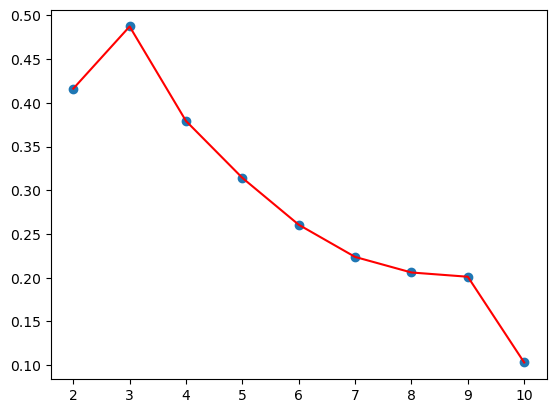

In [269]:
import matplotlib.pyplot as plt
plt.scatter(x=range(2,11,1),y=scores_2)
plt.plot(range(2,11,1),scores_2,color='red')
plt.show()

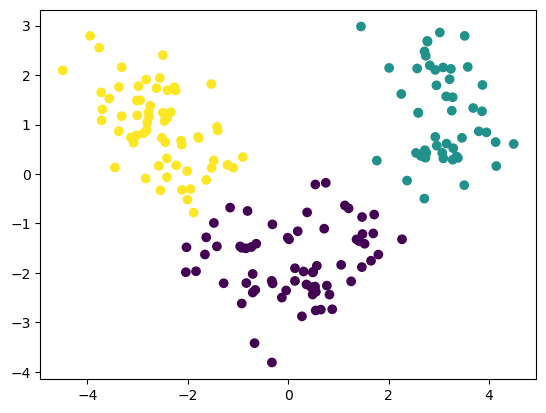

In [273]:
#By using Kvalues as 3.
import matplotlib.pyplot as plt
plt.scatter(X_new[0],X_new[1],c=df["Cluster_pca"])
plt.show()

1.Clustering on Original Dataset:
   *Performed after standardization
   *Uses all original features

Observations:
   *Clusters are influenced by correlated and redundant variables
   *Distance calculations in high dimensions become less reliable
   *Silhouette score shows moderate separation
   *Clusters may overlap due to noise

Clustering on PCA-Transformed Data:
   *PCA applied after scaling
   *Reduced features to principal components explaining most variance

Observations:
   *Clusters are more compact and better separated
   *Improved visualization in 2D/3D
   *Silhouette score is more stable or slightly higher
   *Reduced sensitivity to noise and multicollinearity

Conclusion:
   PCA-based clustering demonstrates cleaner structure and improved stability compared to clustering on the original dataset.


2. Similarities and Differences in Clustering Results:

   Similarities:
     *Same clustering algorithm (KMeans)
     *Same evaluation metric (Silhouette Score)
     *Optimal number of clusters (k) remains approximately consistent
   
   Differences:
     *Dimensionality is high in original data vs Dimensionality is reduced in PCA data
     *Noise Sensitivity is high in original data vs Noise Sensitivity is low in PCA data
     *Cluster Separation is Moderate in original data and Cluster Separation is clear in PCA data
     *Computation Time is Higher in original data and Computation Time is lower in PCA data
     *Visualization is Difficult in original data and Visualization is easy in PCA data
     *Interpretability is Feature-level in original data and Interpretability is Component-level in original data

3. Impact of Dimensionality Reduction on Clustering Performance:

Positive Impact:
  *Eliminates correlated and redundant features
  *Reduces noise -> better cluster compactness
  *Improves silhouette score stability
  *Faster model convergence
  *Easier interpretation of cluster structure visually

Negative Impact
  *PCA is unsupervised -> may discard cluster-important variance
  *Loss of direct feature interpretability
  *Over-reduction may degrade clustering quality

Dimensionality reduction improves clustering when the dataset contains correlated features, as observed in your notebook.

4.Recommendations: When to Use Each Technique:

  *High-dimensional data - PCA + Clustering
  *Highly correlated features - PCA
  *Business interpretation needed - Original features
  *Visualization required - PCA
  *Small, clean datasets - Original data




Conclusion:
         *PCA-based clustering offers better generalization, stability, and scalability, while clustering on original data provides higher interpretability.
         *In this dataset and analysis, PCA + KMeans is the preferred approach.